In [1]:
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['No Heart disease', 'Had Heart disease']); ax.yaxis.set_ticklabels(['No Heart disease', 'Had Heart disease'])

In [3]:
df = pd.read_csv('wrangled_data.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df['BMI'] = df['WTKG3']/(pow(df['HEIGHT']/100., 2))

In [6]:
df=df[df['_AGEG5YR']!=14]

In [42]:
X = df[['_SEX', '_HCVU651','_AGEG5YR','_RACE', 'DIABETE4','SMOKE']]

In [43]:
Y = np.array(df['MICHD'])

In [44]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

## First we reduce the size of the data set to find the best model
**We consider only 10% of data of using train test split**

In [10]:
#X_small, X_large, Y_small, Y_large = train_test_split(X, Y, test_size = 0.9, random_state = 4)

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

## Logistic Regression

In [46]:
parameters ={"C":[0.001,0.01,0.1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [47]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.913995427990856


In [48]:
ylr = logreg_cv.predict(X_test)
metrics.accuracy_score(Y_test, ylr)

0.915774501212837

In [14]:
y_prob=logreg_cv.predict_proba(X_test)

In [18]:
metrics.roc_curve(Y_test,ylr)

(array([0.00000000e+00, 4.99161132e-04, 1.00000000e+00]),
 array([0.        , 0.00362538, 1.        ]),
 array([2, 1, 0]))

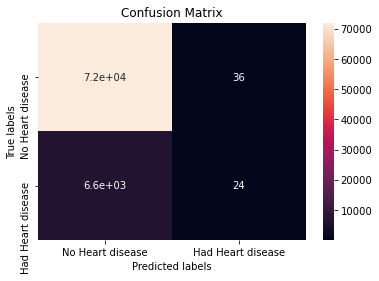

In [78]:
plot_confusion_matrix(Y_test,ylr)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+01, 4.0000e+01,
         9.7300e+02, 1.1090e+03, 6.2010e+03, 1.4957e+04, 5.5441e+04],
        [5.5441e+04, 1.4957e+04, 6.2010e+03, 1.1090e+03, 9.7300e+02,
         4.0000e+01, 2.0000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([0.00563931, 0.10451144, 0.20338358, 0.30225572, 0.40112786,
        0.5       , 0.59887214, 0.69774428, 0.79661642, 0.89548856,
        0.99436069]),
 <a list of 2 Lists of Patches objects>)

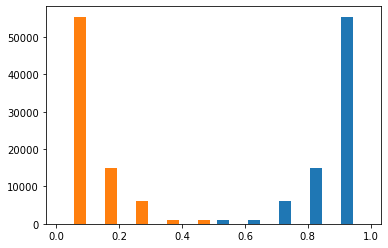

In [17]:
plt.hist(y_prob)

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_small, Y_small, test_size = 0.2, random_state = 4)

## Support Vector Machine (SVM)
**It takes too long time to fit the model**

In [15]:
# parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
#               'C': np.logspace(-3, 3, 5),
#               'gamma':np.logspace(-3, 3, 5)}
# svm = SVC()
# svm_cv = GridSearchCV(svm, parameters, cv = 10)
# svm_cv.fit(X_train, Y_train)

In [ ]:
# print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
# print("accuracy :",svm_cv.best_score_)

In [16]:
# ysvm = svm_cv.predict(X_test)
# metrics.accuracy_score(Y_test, ysvm)

In [17]:
# plot_confusion_matrix(Y_test,ysvm)

## Decision tree classifier

In [14]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, parameters, cv = 5, n_jobs=12)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [15]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.9140621031242062


In [16]:
ytree = tree_cv.predict(X_test)
metrics.accuracy_score(Y_test, ytree)

0.9159268995821744

In [17]:
metrics.f1_score(ytree, Y_test)

0.0

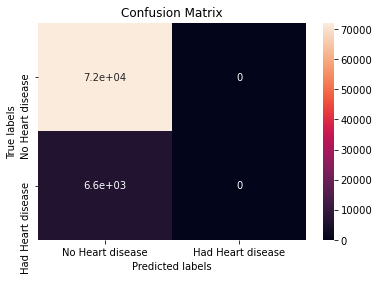

In [18]:
plot_confusion_matrix(Y_test,ytree)

In [20]:
y_prob=tree_cv.predict_proba(X_test)

(array([[0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         4.0000e+00, 3.4690e+03, 2.5330e+03, 2.5661e+04, 4.7074e+04],
        [4.7074e+04, 2.5661e+04, 2.5330e+03, 3.4690e+03, 4.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

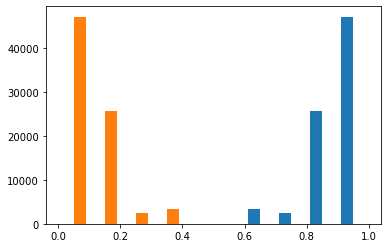

In [21]:
plt.hist(y_prob)

## K-Nearest Neighbour

In [11]:
#parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#              'p': [1,2]}

parameters = {'n_neighbors': [4,5,6,7],
             'algorithm': ['auto'],
             'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN, parameters , cv =5, n_jobs=12)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=12,
             param_grid={'algorithm': ['auto'], 'n_neighbors': [4, 5, 6, 7],
                         'p': [1, 2]})

In [12]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 6, 'p': 2}
accuracy : 0.9122110744221489


In [13]:
yknn = knn_cv.predict(X_test)
metrics.accuracy_score(Y_test, yknn)

0.9132980277111035

In [22]:
metrics.f1_score(yknn, Y_test)

0.0679863481228669

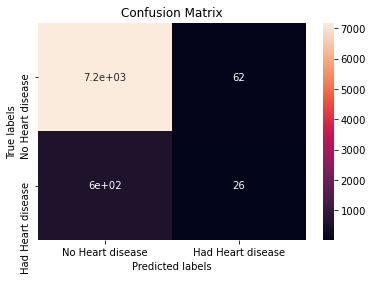

In [19]:
plot_confusion_matrix(Y_test,yknn)

In [33]:
y_prob=knn_cv.predict_proba(X_test)

(array([[1.2000e+01, 4.8000e+01, 0.0000e+00, 6.4500e+02, 0.0000e+00,
         2.3010e+03, 5.8580e+03, 0.0000e+00, 1.5185e+04, 5.4692e+04],
        [5.4692e+04, 1.5185e+04, 0.0000e+00, 5.8580e+03, 0.0000e+00,
         2.3010e+03, 6.4500e+02, 0.0000e+00, 4.8000e+01, 1.2000e+01]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 Lists of Patches objects>)

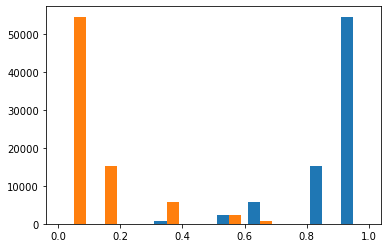

In [28]:
plt.hist(y_prob)

## Sample single input
### Input parameters are '_SEX', '_HCVU651','_AGEG5YR','_RACE', 'DIABETE4','SMOKE'

In [128]:
X_input = [[2,2,7,3,1,2]]

In [129]:
X_input = transform.fit(X).transform(X_input)

In [130]:
print('The probability of getting heart disease is %.1f%%'%(logreg_cv.predict_proba(X_input)[0][1]*100))

The probability of getting heart disease is 95.8%


array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       ...,
       [0.83333333, 0.16666667],
       [1.        , 0.        ],
       [0.5       , 0.5       ]])

# Imbalanced class: 

Although these classifiers predicts the outcome with 91-92% accuracy, if we look at the F1-score and the confussion matrix we find that they fail misearably to predict even a single positive case. The reason is the data is originally highly imbalanced, i.e. the positive case 'MICHD'=1 is only 8% of data. There are many method to overcome the problem of imbalanced class. However, we do not use those since our aim is not to target a prticular user and predict if he or she is going to get heart-attack. Rather, we would like to find the probability of developing heart-disease and how much greater or less that is compared to the other healthy individuals. Therefore we choose Naive-Bayes classifer.

In [8]:
from sklearn.naive_bayes import MultinomialNB

df=df[['_SEX','_AGEG5YR','_HCVU651','DIABETE4','_TOTINDA','_RFDRHV7','SLEPTIM1','SMOKE','MICHD']].astype(int)

In [9]:
X = np.array(df[['_SEX','_AGEG5YR','_HCVU651','DIABETE4','_TOTINDA','_RFDRHV7','SLEPTIM1','SMOKE']])
y = np.array(df['MICHD'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)



In [11]:
clf = MultinomialNB()
#clf = CategoricalNB()
clf.fit(X_train, Y_train)

MultinomialNB()

In [13]:
clf.predict_proba(X_test)[:,1]

array([0.03924966, 0.09940949, 0.08479846, ..., 0.147168  , 0.07549221,
       0.04397861])

We use this as a probability developing heart-disease of individual 